In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

In [4]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2021)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))
print(">>>> # of Train data Y : {}".format(Counter(Y.iloc[train_idx])))
print(">>>> # of valid data Y : {}".format(Counter(Y.iloc[valid_idx])))

>>>> # of Train data : 372
>>>> # of valid data : 160
>>>> # of Train data Y : Counter({0: 241, 1: 131})
>>>> # of valid data Y : Counter({0: 110, 1: 50})


In [5]:
# AdaBoost Hyperparameter
estimators = [70, 90, 100] ## 몇 개의 약한 학습기를 순차적으로 학습시킬 것인지. ex) 70 -> 70개의 weak classifier를 사용
learning = [0.01, 0.03, 0.05, 0.1, 0.5] ## learning rates

# Modeling
save_est = []
save_lr = []
f1_score_ = []

cnt = 0
for est in estimators:
    for lr in learning:
        print(">>> {} <<<".format(cnt))
        cnt += 1
        print("Number of Estimators : {}, Learning Rate : {}".format(est, lr))
        
        model = AdaBoostClassifier(n_estimators=est, learning_rate=lr, random_state=119)
        model.fit(X.iloc[train_idx], Y.iloc[train_idx])

        # Train Acc
        y_pre_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
        print("Train Confusion Matrix")
        print(cm_train)
        print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
        print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

        # Test Acc
        y_pre_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
        print("Test Confusion Matrix")
        print(cm_test)
        print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
        print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
        print("-----------------------------------------------------------------------")
        print("-----------------------------------------------------------------------")
        save_est.append(est)
        save_lr.append(lr)
        f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 70, Learning Rate : 0.01
Train Confusion Matrix
[[188  53]
 [  9 122]]
Train Acc : 0.8333333333333334
Train F1-Score : 0.7973856209150328
Test Confusion Matrix
[[81 29]
 [ 1 49]]
TesT Acc : 0.8125
Test F1-Score : 0.765625
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 70, Learning Rate : 0.03
Train Confusion Matrix
[[199  42]
 [ 11 120]]
Train Acc : 0.8575268817204301
Train F1-Score : 0.8191126279863481
Test Confusion Matrix
[[84 26]
 [ 2 48]]
TesT Acc : 0.825
Test F1-Score : 0.7741935483870968
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 70, Learning Rate : 0.05
Train Confusion Matrix
[[200  41]
 [ 10 121]]
Train Acc : 0.8629032258064516
Train F1-Score : 0.8259385665529011
Test Confusion Matrix


In [6]:
print(">>> {} <<<\nBest Test f1-score : {}\nBest n_estimators : {}\nBest Learning Rate : {}".format(np.argmax(f1_score_),
                                                                                                    f1_score_[np.argmax(f1_score_)], 
                                                                                                    save_est[np.argmax(f1_score_)],
                                                                                                    save_lr[np.argmax(f1_score_)]))

>>> 4 <<<
Best Test f1-score : 0.7899159663865546
Best n_estimators : 70
Best Learning Rate : 0.5


In [7]:
best_model = AdaBoostClassifier(n_estimators=save_est[np.argmax(f1_score_)], learning_rate=save_lr[np.argmax(f1_score_)], random_state=119)
best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[231  10]
 [  8 123]]
Train Acc : 0.9516129032258065
Train F1-Score : 0.9318181818181818
Test Confusion Matrix
[[88 22]
 [ 3 47]]
TesT Acc : 0.84375
Test F1-Score : 0.7899159663865546


In [8]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.171429    event
1   0.128571    cd420
2   0.114286  preanti
3   0.100000     cd40
4   0.085714     wtkg
5   0.085714        r
6   0.085714    cd820
7   0.071429     cd80
8   0.071429    cd496
9   0.057143      age
10  0.028571     race
11  0.000000   zprior
12  0.000000      z30
13  0.000000  symptom
14  0.000000    strat
15  0.000000     str2
16  0.000000   oprior
17  0.000000   karnof
18  0.000000     homo
19  0.000000     hemo
20  0.000000   gender
21  0.000000    drugs


/var/folders/h2/dxdwtry542514hp51hkrx__h0000gn/T/ipykernel_11273/777005932.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 40}` instead.

  sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)


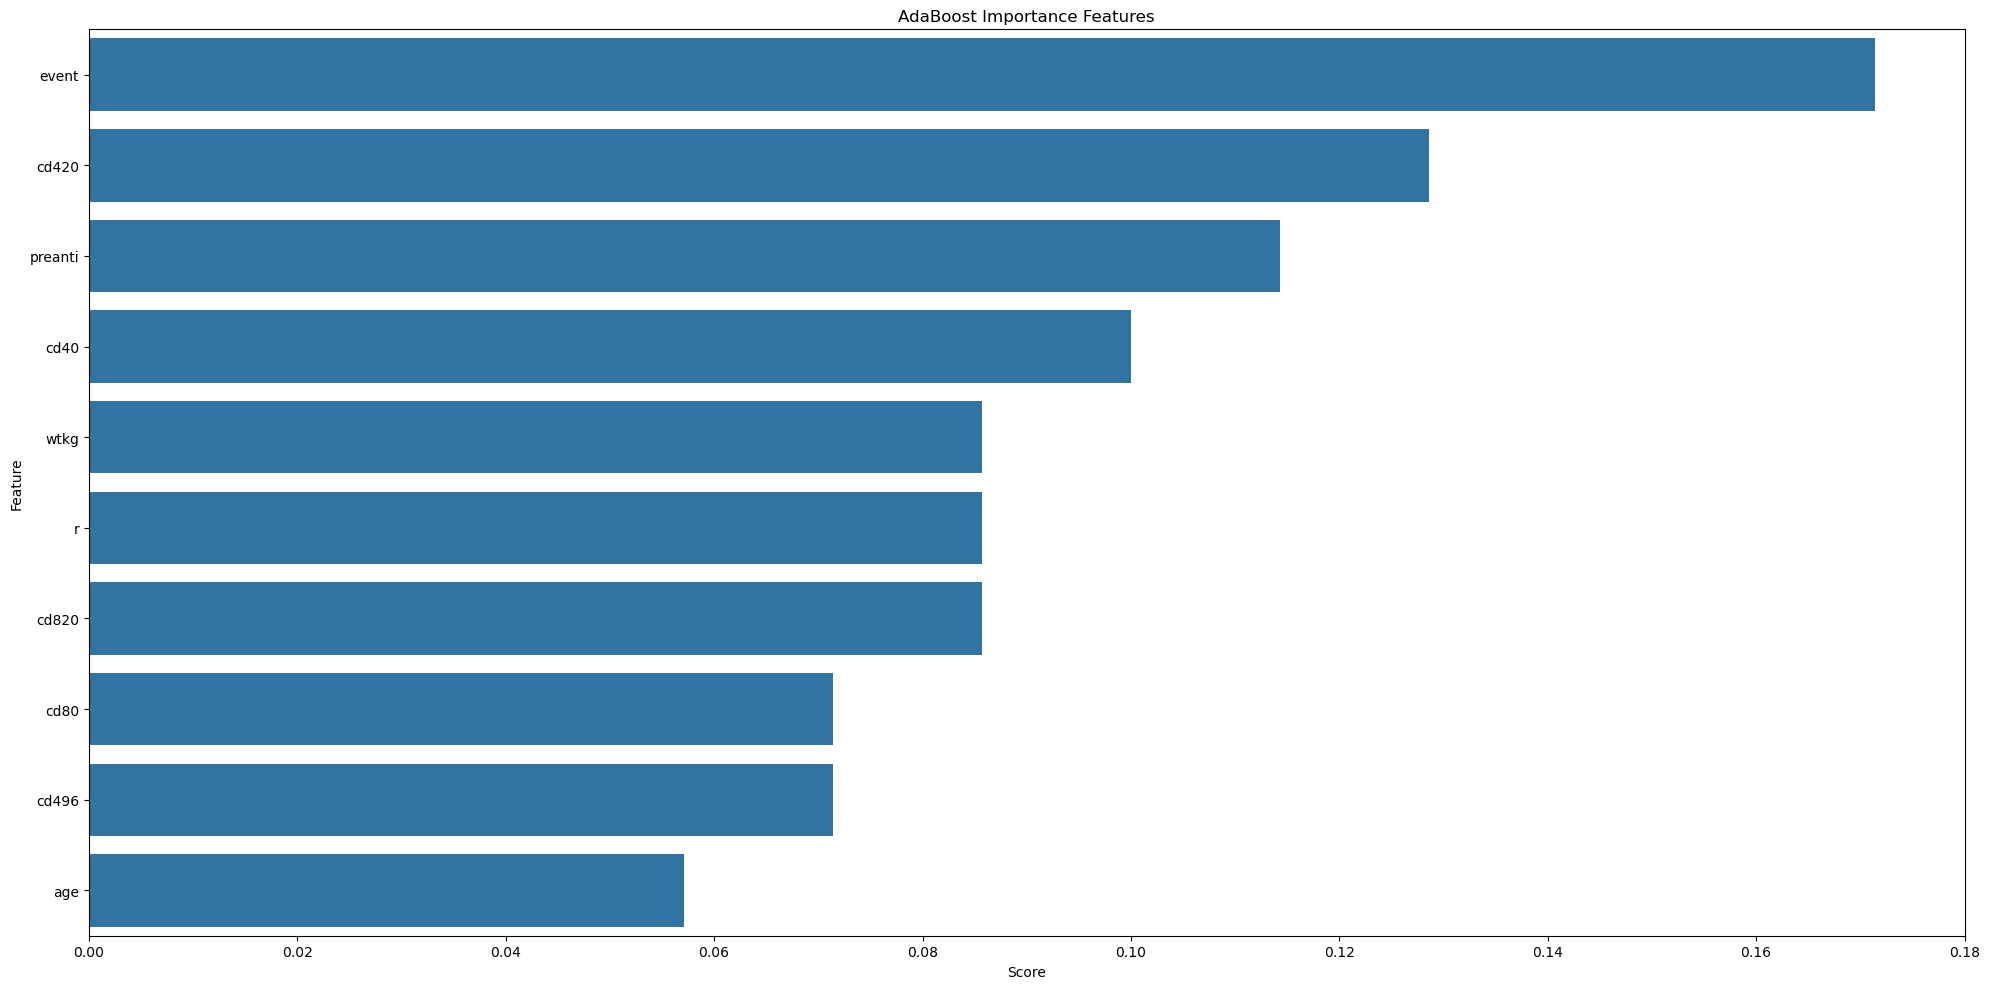

In [9]:
# Importance Score Top 10
feature_map_20 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('AdaBoost Importance Features')
plt.tight_layout()
plt.show()